# **Vanilla Reinforce Algorithm**


### Analytical derivative of softmax:

<img src="Gradlogpolderiv.JPG" alt="Drawing" style="width: 600px;"/>


    

## Comparison of Hard Vs Easy GW

In [1]:
### Importing packages and setting environment
from REINFORCE import REINFORCE 
import abdulgym
import numpy as np
import matplotlib.pyplot as plt
env=abdulgym.make('AAgridworld-v0')

### Initializing Policy & hyperparameters
ep_len=100 #change to 100
gamma=1
learning_rate=0.001 #use 0.01
num_epis_max=100000 #change to 10,000
num_actions=env.action_space.n
num_state=5*5

theta=np.random.rand(num_actions, num_state)
thetah=np.random.rand(num_actions, num_state)

### Running Learning algorithm
meta_data=[ep_len, gamma,learning_rate, num_epis_max, num_actions, num_state,theta]
traj, reward_accum, theta_accum, action, state, _ , _= REINFORCE(env, meta_data)

meta_datah=[ep_len, gamma, learning_rate, num_epis_max, num_actions, num_state, thetah]
trajh, reward_accumh, theta_accumh, actionh, stateh, policyh, _= REINFORCE(env, meta_datah, difficulty=True)

In [2]:
avg_reward=[]
avg_rewardh=[]
for i in range(num_epis_max):
    if i > 100:
        avg_reward.append(np.mean(reward_accum[i-100:]))
        avg_rewardh.append(np.mean(reward_accumh[i-100:]))

Easy GW, episode length= 100 learning rate= 0.001 gamma= 1


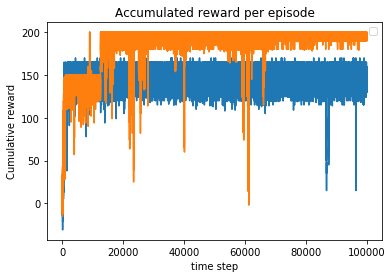

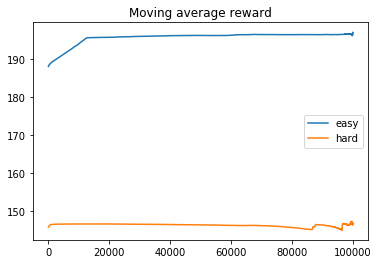

In [3]:
print("Easy GW, episode length=" ,ep_len, "learning rate=", learning_rate, "gamma=", gamma)
plt.title('Accumulated reward per episode')
plt.xlabel('time step')
plt.ylabel('Cumulative reward')
plt.legend(['hard','easy'])
plt.plot(range(1,num_epis_max+1), reward_accumh, reward_accum)
plt.show()

plt.plot(range(1,num_epis_max-100), avg_reward, avg_rewardh)
plt.title('Moving average reward')
plt.legend(['easy','hard'])
plt.show()

## Testing different policy parameter initialization

Hard, episode length= 100 learning rate= 0.001 gamma= 1


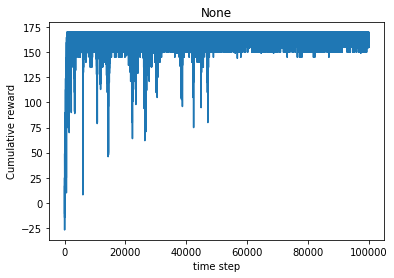

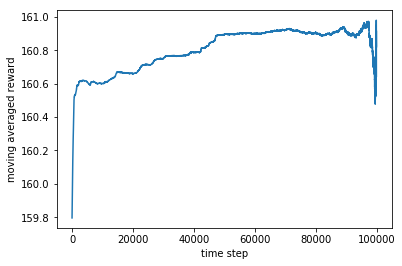

In [4]:
#this section initializes theta to larger than [0,1] values
theta2=np.random.rand(num_actions,num_state)*10 
meta_data=[ep_len,gamma,learning_rate,num_epis_max,num_actions,num_state,theta2]
traj2, reward_accum2, theta_accum2, action2, state2 , _ , _= REINFORCE(env,meta_data)
avg_reward2=[]
for i in range(num_epis_max):
    if i > 100:
        avg_reward2.append(np.mean(reward_accum2[i-100:]))
                   
plt.title(print("Hard, episode length=" ,ep_len, "learning rate=", learning_rate, "gamma=", gamma))
plt.xlabel('time step')
plt.ylabel('Cumulative reward')
plt.plot(reward_accum2)
plt.show()
plt.xlabel('time step')
plt.ylabel('moving averaged reward')
plt.plot(avg_reward2)
plt.show()

In [5]:
from REINFORCE import softmax_policy
[a,b]=theta.shape
policy=np.zeros_like(theta)
bigP=np.zeros_like(theta)

for i in range(b):
    policy[:,i]=softmax_policy(theta[:,i])
for i in range(b):
    bigP[:,i]=softmax_policy(theta2[:,i])
    


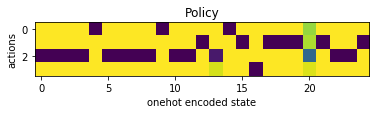

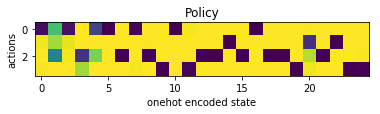

In [10]:
plt.imshow(-policy)
plt.title('Policy')
plt.xlabel('onehot encoded state')
plt.ylabel('actions')
plt.show()
plt.imshow(-bigP)
plt.title('Policy')
plt.xlabel('onehot encoded state')
plt.ylabel('actions')
plt.show()

## Policy Visualization

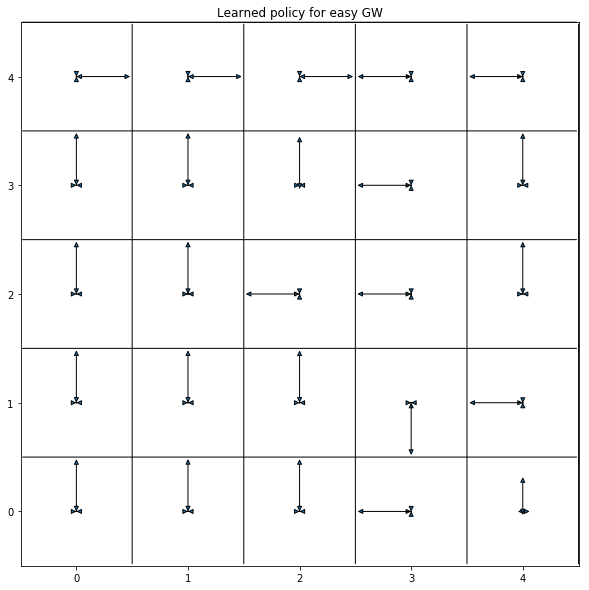

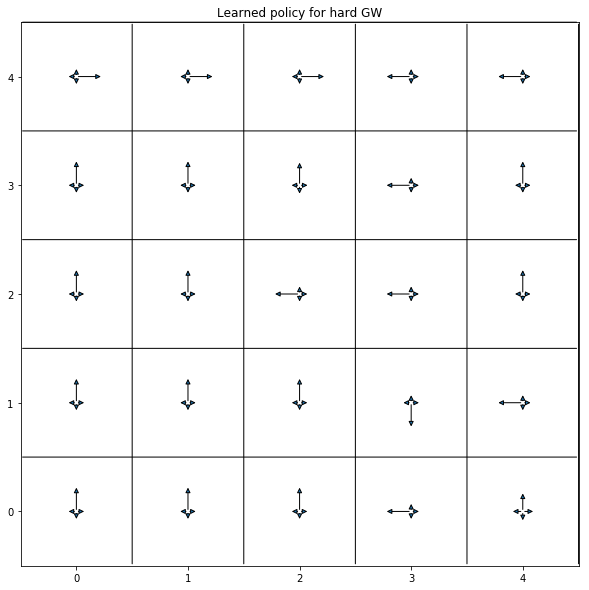

In [11]:
from REINFORCE import softmax_policy
x = np.linspace(0,6)
y = np.linspace(0,6)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.annotate('', xy=(i+.5,-.5), xytext=(i+.5,4.5), arrowprops={'arrowstyle': '-'}, va='center')
for i in range(5):
    plt.annotate('', xy=(-0.5,i+.5), xytext=(4.5,i+.5), arrowprops={'arrowstyle': '-'}, va='center')

# 0 right 1 left
# 2 up    3 down    
p=np.zeros(4)
#p[0]=1 #probability of that action happening policy(action|state)
#p[1]=1
#p[2]=1
#p[3]=1

[a,b]=theta.shape
policy=np.zeros_like(theta)
for i in range(b):
    policy[:,i]=softmax_policy(theta[:,i])
policyh=np.zeros_like(theta)
for i in range(b):
    policyh[:,i]=softmax_policy(policy[:,i])

for i in range(5):
    for j in range(5):
        flat_loc=i*5+j #onehotting the state
        #print(j,i)
        #print(flat_loc)
        p=policy[:,flat_loc]
        
        plt.annotate('', xytext=(i,j), xy=((.5*p[0]+i),j), arrowprops={'arrowstyle': '-|>'}, va='center')#right
        plt.annotate('', xytext=(i,j), xy=(-(.5*p[1])+i,j), arrowprops={'arrowstyle': '-|>'}, va='center')#left
        plt.annotate('', xytext=(i,j), xy=(i,0.5*p[2]+j), arrowprops={'arrowstyle': '-|>'}, va='center')#up
        plt.annotate('', xytext=(i,j), xy=(i,-0.5*p[3]+j), arrowprops={'arrowstyle': '-|>'}, va='center')#down
#plt.plot(x,y,'x')
plt.xlim(-0.5,4.5)
plt.ylim(-0.5,4.5)
plt.title('Learned policy for easy GW')
plt.show()

x = np.linspace(0,6)
y = np.linspace(0,6)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.annotate('', xy=(i+.5,-.5), xytext=(i+.5,4.5), arrowprops={'arrowstyle': '-'}, va='center')
for i in range(5):
    plt.annotate('', xy=(-0.5,i+.5), xytext=(4.5,i+.5), arrowprops={'arrowstyle': '-'}, va='center')

# 0 right 1 left
# 2 up    3 down    
ph=np.zeros(4)

for i in range(5):
    for j in range(5):
        flat_loc=i*5+j #onehotting the state
        #print(j,i)
        #print(flat_loc)
        ph=policyh[:,flat_loc]
        
        plt.annotate('', xytext=(i,j), xy=((.5*ph[0]+i),j), arrowprops={'arrowstyle': '-|>'}, va='center')#right
        plt.annotate('', xytext=(i,j), xy=(-(.5*ph[1])+i,j), arrowprops={'arrowstyle': '-|>'}, va='center')#left
        plt.annotate('', xytext=(i,j), xy=(i,0.5*ph[2]+j), arrowprops={'arrowstyle': '-|>'}, va='center')#up
        plt.annotate('', xytext=(i,j), xy=(i,-0.5*ph[3]+j), arrowprops={'arrowstyle': '-|>'}, va='center')#down
#plt.plot(x,y,'x')
plt.xlim(-0.5,4.5)
plt.title('Learned policy for hard GW')

plt.ylim(-0.5,4.5)
plt.show()


# Conclusion
The REINFORCE algorithm was written to learn a optimal policy for Gridworld environment. The hard GW example was harder to learn which resulted in noiser rewards, slower and more variance in learning. Consequenctly, the resulting algorithm is "less confident" about the resulting policy after seeing the probabilities are less varried. 


Another variation tested was initialized theta as random values: [0,1) vs [0,10). That was brought up to test the effect of the exponent in the softmax function on results. It was discovered that learned policy had more gradient between highest and lowest probability as well as slightly faster learning curve. 